In [1]:
from ema_workbench import (Model, RealParameter,CategoricalParameter, IntegerParameter, TimeSeriesOutcome, ema_logging, perform_experiments)
# from ema_workbench.connectors.excel import ExcelModel
from ema_workbench.em_framework.evaluators import MultiprocessingEvaluator
from ema_workbench.em_framework.outcomes import ArrayOutcome, ScalarOutcome
from ema_workbench.util import ema_exceptions
#from ema_workbench.analysis.plotting import lines
from ema_workbench.analysis import pairs_plotting
#feature scoring
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import prim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from pandas.core.indexing import convert_missing_indexer, convert_to_index_sliceable
import os 
import warnings
from math import floor
from ema_workbench.analysis import dimensional_stacking

# Change the current working directory
os.chdir('C:\\Users\\wb558960\\OneDrive - WBG\\CCDRs LAC\\Argentina\\DeepDives\\Vaca Muerta\\Python\\src')
#print("Current working directory: {0}".format(os.getcwd()))

In [2]:
indir = "C:\\Users\\wb558960\\OneDrive - WBG\\CCDRs LAC\\Argentina\\DeepDives\\Vaca Muerta\\Python\\outputs\\"
outdir ='C:\\Users\\wb558960\\OneDrive - WBG\\CCDRs LAC\\Argentina\\DeepDives\\Vaca Muerta\\Python\\outputs\\plots\\'

In [3]:
colnames= ['year','run','Conv_gas_price','Unconv_gas_price','Conv_oil_price','Unconv_oil_price',
'Conv_gas_ds_capex','Unconv_gas_ds_capex','Conv_oil_ds_capex','Unconv_oil_ds_capex',
'Conv_gas_opex','Unconv_gas_opex','Conv_oil_opex','Unconv_oil_opex',
'Conv_gas_domestic revenue','Unconv_gas_domestic revenue','Conv_oil_domestic revenue','Unconv_oil_domestic revenue',
'Conv_gas_export revenue','Unconv_gas_export revenue','Conv_oil_export revenue','Unconv_oil_export revenue',
'Conv_gas_production subsidy','Unconv_gas_production subsidy','Conv_oil_production subsidy','Unconv_oil_production subsidy',
'Conv_gas_import subsidy','Unconv_gas_import subsidy','Conv_oil_import subsidy','Unconv_oil_import subsidy',
'Conv_gas_royalties','Unconv_gas_royalties','Conv_oil_royalties','Unconv_oil_royalties',
'Conv_gas_export duties','Unconv_gas_export duties','Conv_oil_export duties','Unconv_oil_export duties',
'Conv_gas_trade balance','Unconv_gas_trade balance','Conv_oil_trade balance','Unconv_oil_trade balance',
'Conv_gas_us_capex','Unconv_gas_us_capex','Conv_oil_us_capex','Unconv_oil_us_capex',
'Conv_gas_starts','Unconv_gas_starts','Conv_oil_starts','Unconv_oil_starts',
'Conv_gas_discount_factor','Unconv_gas_discount_factor','Conv_oil_discount_factor','Unconv_oil_discount_factor']


In [27]:
outcomes = pd.read_csv(indir+"vm_outcomes_2.csv")
experiments = pd.read_csv(indir+"vm_experiments_2.csv")
tradebal= pd.read_csv(indir+"fiscal ts outcomes_2.csv",index_col = False,names = colnames, skiprows = 1 )
physbal = pd.read_csv(indir+"physical ts outcomes_2.csv" )

In [28]:
fbal = tradebal.groupby('run').mean()

# pbal =  physbal.groupby('run').mean()
# print(pbal.head())

In [29]:
data = pd.merge(outcomes, experiments)
data = data.rename(columns= {'Unnamed: 0':'run'}).set_index('run')
data = pd.merge(data,fbal, left_on = 'run',right_on= 'run')

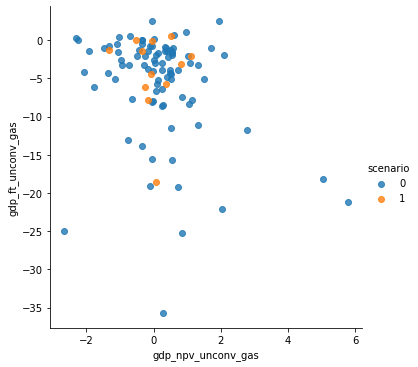

In [42]:
#define scenario

data.scenario = 0 
data.loc[(data['rcp'] =='CURR')&(data['gas_export_dem_end'] >0.25)&(data['wells_total'] >=15000), 'scenario'] =0
data.loc[(data['rcp'] =='1.5')&(data['gas_export_dem_end'] <= 0.25)&(data['wells_total'] >=15000), 'scenario'] =1
data.loc[(data['rcp'] =='1.5')&(data['gas_export_dem_end'] <=0.25) &(data['wells_total'] < 15000), 'scenario'] = 2


plot = sns.lmplot(x="gdp_npv_unconv_gas", y="gdp_ft_unconv_gas", data=data, fit_reg=False, hue='scenario', legend=True)
plt.show()

In [37]:
#define success

data.loc[(data['gdp_npv_unconv_gas'] >0)&(data['gdp_ft_unconv_gas'] >0)&(data['Unconv_gas_trade balance'] >0), 'success3'] =1
data.loc[(data['gdp_npv_unconv_gas'] <0)|(data['gdp_ft_unconv_gas'] <0)|(data['Unconv_gas_trade balance'] <0), 'success3'] =0


data.loc[(data['gdp_npv_unconv_gas'] >0)&(data['gdp_ft_unconv_gas'] >0), 'success_ft'] =1
data.loc[(data['gdp_npv_unconv_gas'] <0)|(data['gdp_ft_unconv_gas'] <0), 'success_ft'] =0


data.loc[(data['gdp_npv_unconv_gas'] >0)&(data['Unconv_gas_trade balance'] >0), 'success_tb'] =1
data.loc[(data['gdp_npv_unconv_gas'] <0)|(data['Unconv_gas_trade balance'] <0), 'success_tb'] =0

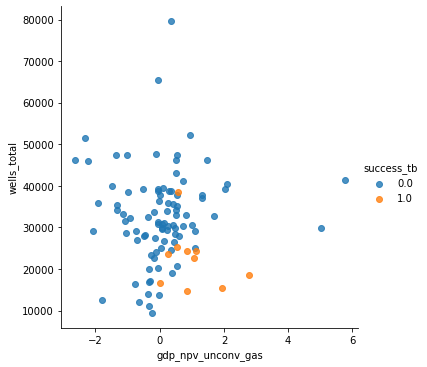

In [38]:
plot = sns.lmplot(x="gdp_npv_unconv_gas", y="wells_total", data=data, fit_reg=False, hue='success_tb', legend=True)
plt.show()

In [40]:
print(pd.Series.corr(data['success3'],data['wells_total']))

-0.19872077644509278


In [41]:
pd.crosstab(data['scenario'],data['success3'])

success3,0.0,1.0
scenario,,
0,86,2
1,12,0
